In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [5]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


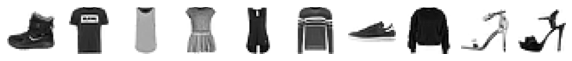

In [6]:
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap = 'gray_r')
    axs[i].axis('off')
plt.show()

In [7]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [8]:
pd.Series(train_target).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

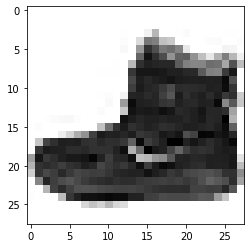

In [9]:
plt.imshow(train_input[0], cmap = 'gray_r')

In [10]:
x_train = train_input.reshape(60000, 28 * 28)
x_test = test_input.reshape(10000, 28 * 28)
y_train = train_target
y_test = test_target

In [11]:
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_test_oh = tf.keras.utils.to_categorical(y_test)

In [15]:
# LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train, y_train)
log.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8412

In [17]:
# deep learning

In [18]:
model = Sequential()
model.add(Dense(128, input_dim = 28 * 28, activation = 'relu'))
model.add(Dense(56, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 56)                7224      
                                                                 
 dense_2 (Dense)             (None, 10)                570       
                                                                 
Total params: 108,274
Trainable params: 108,274
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [20]:
hist = model.fit(x_train, y_train_oh, validation_split = 0.2, epochs = 50, batch_size = 20)

Epoch 1/50
2400/2400 [==============================] - 14s 5ms/step - loss: 2.1388 - accuracy: 0.6734 - val_loss: 0.7745 - val_accuracy: 0.7211
Epoch 2/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.7086 - accuracy: 0.7447 - val_loss: 0.7336 - val_accuracy: 0.7286
Epoch 3/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.6256 - accuracy: 0.7719 - val_loss: 0.5975 - val_accuracy: 0.8102
Epoch 4/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.5543 - accuracy: 0.8048 - val_loss: 0.5604 - val_accuracy: 0.8038
Epoch 5/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.5027 - accuracy: 0.8254 - val_loss: 0.5880 - val_accuracy: 0.8195
Epoch 6/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.4688 - accuracy: 0.8337 - val_loss: 0.5013 - val_accuracy: 0.8289
Epoch 7/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.4490 - accuracy: 0.8405 - val_loss: 0.4904 - val_accuracy

In [21]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 2s 7ms/step - loss: 0.7225 - accuracy: 0.8550


[0.7225181460380554, 0.8550000190734863]

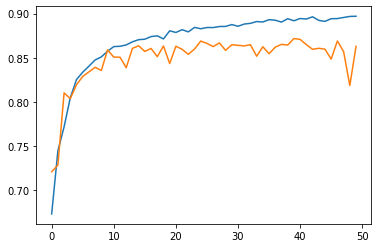

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [23]:
# image matrix 데이터를 vectorizing 하지 말고, matrix 구조 그대로 학습하자 => CNN

In [12]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout

In [13]:
x_train_cov = train_input.reshape(60000, 28, 28, 1)
x_test_cov = test_input.reshape(10000, 28, 28, 1)


In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [15]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')

In [29]:
hist = model.fit(x_test_cov, y_test_oh, epochs = 20, batch_size=10, validation_split=0.2)

Epoch 1/20
800/800 [==============================] - 13s 6ms/step - loss: 1.0866 - accuracy: 0.7154 - val_loss: 0.5337 - val_accuracy: 0.8160
Epoch 2/20
800/800 [==============================] - 5s 6ms/step - loss: 0.5409 - accuracy: 0.8041 - val_loss: 0.4527 - val_accuracy: 0.8340
Epoch 3/20
800/800 [==============================] - 5s 6ms/step - loss: 0.4579 - accuracy: 0.8278 - val_loss: 0.4541 - val_accuracy: 0.8340
Epoch 4/20
800/800 [==============================] - 5s 6ms/step - loss: 0.4237 - accuracy: 0.8469 - val_loss: 0.4760 - val_accuracy: 0.8260
Epoch 5/20
800/800 [==============================] - 5s 6ms/step - loss: 0.3923 - accuracy: 0.8605 - val_loss: 0.4477 - val_accuracy: 0.8445
Epoch 6/20
800/800 [==============================] - 5s 6ms/step - loss: 0.3583 - accuracy: 0.8633 - val_loss: 0.4110 - val_accuracy: 0.8580
Epoch 7/20
800/800 [==============================] - 5s 6ms/step - loss: 0.3442 - accuracy: 0.8761 - val_loss: 0.3991 - val_accuracy: 0.8630
Epoch

In [30]:
model.evaluate(x_test_cov, y_test_oh)

313/313 [==============================] - 2s 6ms/step - loss: 0.1798 - accuracy: 0.9492


[0.17983059585094452, 0.9491999745368958]

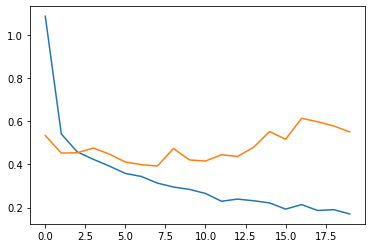

In [32]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

model.summary()

In [16]:
from tensorflow.keras import utils

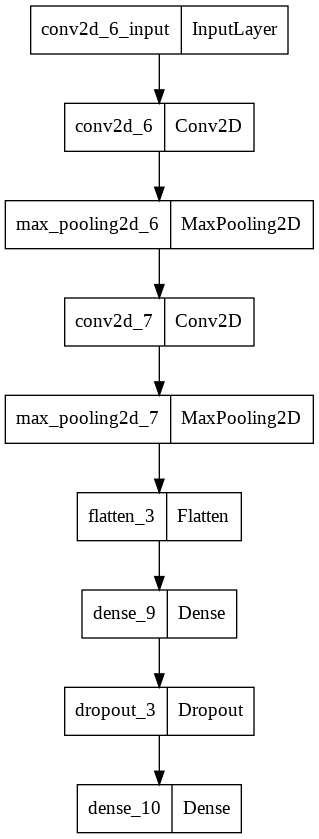

In [53]:
utils.plot_model(model)

In [ ]:
# filter print

In [17]:
model.layers

In [18]:
model.layers[0].weights[0]

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.073519  , -0.03958282,  0.04320189,  0.05081193,
          -0.06049955, -0.13680609,  0.06250663, -0.12242386,
           0.06620994,  0.09215927, -0.0983347 ,  0.07358976,
          -0.11184067,  0.09245178, -0.13173054, -0.06033655,
          -0.0182197 ,  0.13585027, -0.13463496, -0.0979477 ,
           0.09001434,  0.10947375, -0.06130271,  0.04282899,
          -0.06990302,  0.00514017,  0.00634599, -0.07448157,
          -0.05251112, -0.04428222, -0.04689283,  0.00277694]],

        [[-0.07229733, -0.00327793, -0.00784583, -0.04054359,
           0.01527296,  0.00583716, -0.13908155, -0.13080226,
          -0.08217406, -0.02419844,  0.11892729,  0.00130486,
           0.10217655, -0.14178431, -0.02200742,  0.13316695,
           0.03209734, -0.08425833,  0.03152397, -0.11788343,
          -0.05510502,  0.07110947,  0.07050519,  0.02235368,
           0.09167916, -0.13880205,  0.00345136,  0.0030

In [19]:
conv1 = model.layers[0]
conv1_weights = conv1.weights[0].numpy()

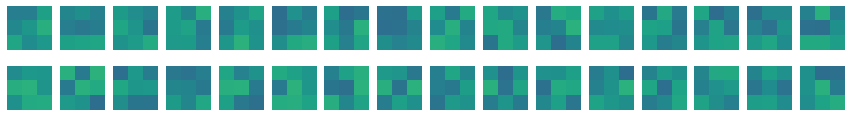

In [22]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv1_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis('off')
    
plt.show()

In [58]:
# layer putput print

In [25]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [26]:
model.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>

In [27]:
from tensorflow.keras.models import Model

In [28]:
conv_acti = Model(model.input, model.layers[0].output)

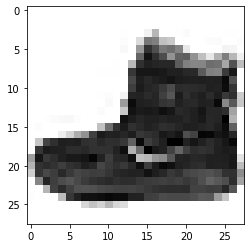

In [29]:
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [30]:
inputs = train_input[0].reshape(-1, 28, 28, 1)
feature_maps = conv_acti.predict(inputs)


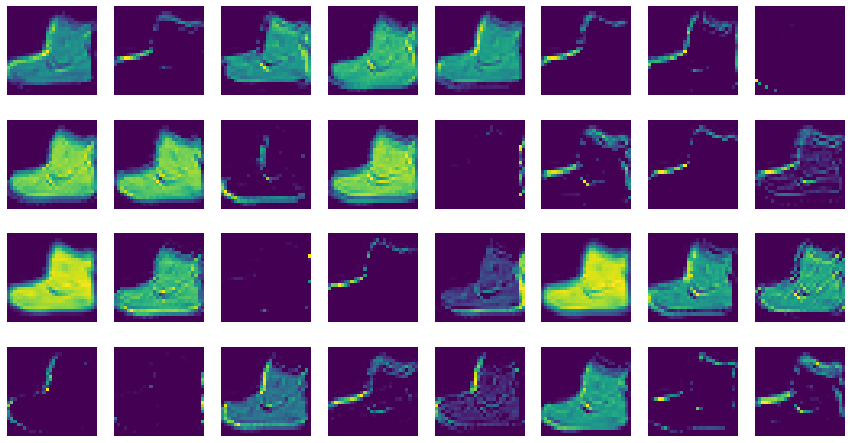

In [31]:
fig, axs = plt.subplots(4, 8, figsize = (15, 8))

for i in range(4):
      for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis('off')
plt.show()